In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm

# CLIP results

In [2]:
########################
# f30k scores
########################
clip_f30k_finetuned = 542.80
clip_f30k_captions_only = 544.34
clip_f30k_images_only = 546.22
clip_f30k_zeroshot = 503.32

clip_f30k_without_sc   = [547.02, 547.04, 542.88, 539.48, 538.42, 531.72, 530.90, 523.64, 520.10, 507.06, 502.86, 490.54, 485.44 , 482.90]
clip_f30k_with_sc      = [544.80, 563.14, 573.38, 581.72, 587.92, 591.76, 595.16, 596.72, 598.48, 598.78, 598.76, 599.60, 599.64, 599.76]


clip_f30k_unique_shortcuts_eval_w = 599.94
clip_f30k_unique_shortcuts_eval_wo = 435.48

clip_f30k_scores = [
    clip_f30k_finetuned,
    clip_f30k_captions_only, clip_f30k_images_only,
    clip_f30k_zeroshot,
    clip_f30k_without_sc, clip_f30k_with_sc,
    clip_f30k_unique_shortcuts_eval_w, clip_f30k_unique_shortcuts_eval_wo
]

########################
# coco scores
########################
clip_coco_finetuned = 445.88
clip_coco_captions_only = 444.00
clip_coco_images_only = 447.23
clip_coco_zeroshot = 350.08

clip_coco_without_sc   = [449.48, 443.94, 438.21, 431.92, 422.64, 411.07, 399.47, 381.19, 363.01, 344.83, 323.98, 308.08, 288.11, 267.51]
clip_coco_with_sc      = [445.21, 482.58, 516.93, 544.21, 561.54, 573.54, 582.80, 586.87, 588.04, 587.55, 586.98, 592.06, 595.32, 597.40]


clip_coco_unique_shortcuts_eval_w = 599.93
clip_coco_unique_shortcuts_eval_wo = 158.39

clip_coco_scores = [
    clip_coco_finetuned,
    clip_coco_captions_only, clip_coco_images_only,
    clip_coco_zeroshot,
    clip_coco_without_sc, clip_coco_with_sc,
    clip_coco_unique_shortcuts_eval_w, clip_coco_unique_shortcuts_eval_wo
]

# VSE results

In [3]:
#######################################
# VSE SCORES
#######################################

########################
# f30k scores
########################
vse_f30k_finetuned = 412.80
vse_f30k_captions_only = 394.68
vse_f30k_images_only = 403.42
vse_f30k_zeroshot = 0.0

vse_f30k_without_sc   = [344.40, 366.48, 352.64, 341.18, 312.02, 281.56, 250.26, 190.62, 128.90, 86.04, 24.28, 5.68, 5.72, 4.42]
vse_f30k_with_sc      = [401.28, 440.56, 484.20, 512.36, 530.40, 549.62, 565.24, 572.28, 577.00, 580.44, 575.96, 570.10, 584.10, 591.68]


vse_f30k_unique_shortcuts_eval_w = 600.00
vse_f30k_unique_shortcuts_eval_wo = 2.76

vse_f30k_scores = [
    vse_f30k_finetuned,
    vse_f30k_captions_only, vse_f30k_images_only,
    vse_f30k_zeroshot,
    vse_f30k_without_sc, vse_f30k_with_sc,
    vse_f30k_unique_shortcuts_eval_w, vse_f30k_unique_shortcuts_eval_wo
]

########################
# coco scores
########################
vse_coco_finetuned = 359.06
vse_coco_captions_only = 320.28
vse_coco_images_only = 360.03
vse_coco_zeroshot = 0.0

vse_coco_without_sc   = [323.78, 300.22, 292.48, 274.26, 252.88, 241.10, 209.32, 190.01, 157.86, 109.72, 71.24, 23.18, 4.82, 1.18]
vse_coco_with_sc      = [354.54, 404.43, 452.19, 491.77, 521.85, 545.02, 561.44, 571.22, 573.74, 569.40, 564.22, 565.98, 563.87, 568.62]


vse_coco_unique_shortcuts_eval_w = 600.00
vse_coco_unique_shortcuts_eval_wo = 0.72

vse_coco_scores = [
    vse_coco_finetuned,
    vse_coco_captions_only, vse_coco_images_only,
    vse_coco_zeroshot,
    vse_coco_without_sc, vse_coco_with_sc,
    vse_coco_unique_shortcuts_eval_w, vse_coco_unique_shortcuts_eval_wo
]

# Plot generation

Saved CLIP plot to ./out/CLIP_f30k_coco_shortcut_eval_linear.pdf


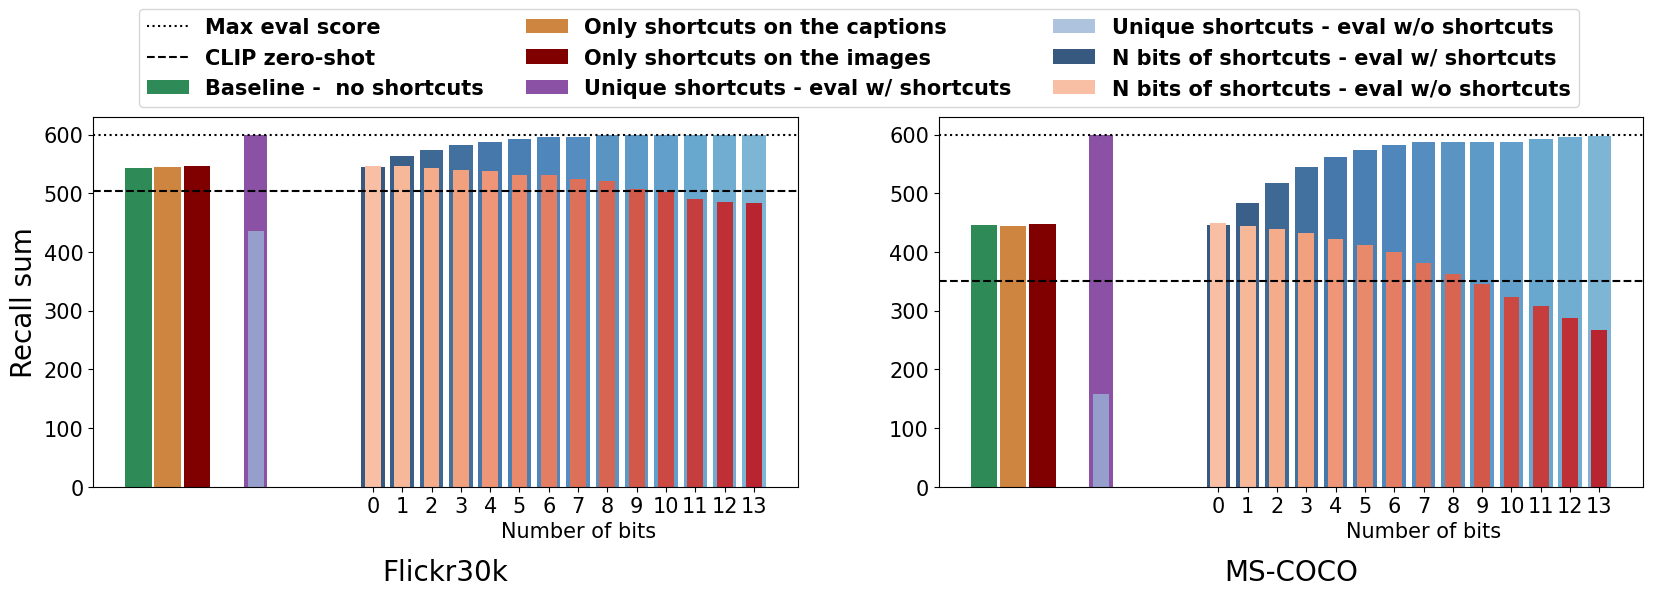

Saved VSE plot to ./out/VSE_f30k_coco_shortcut_eval_linear.pdf


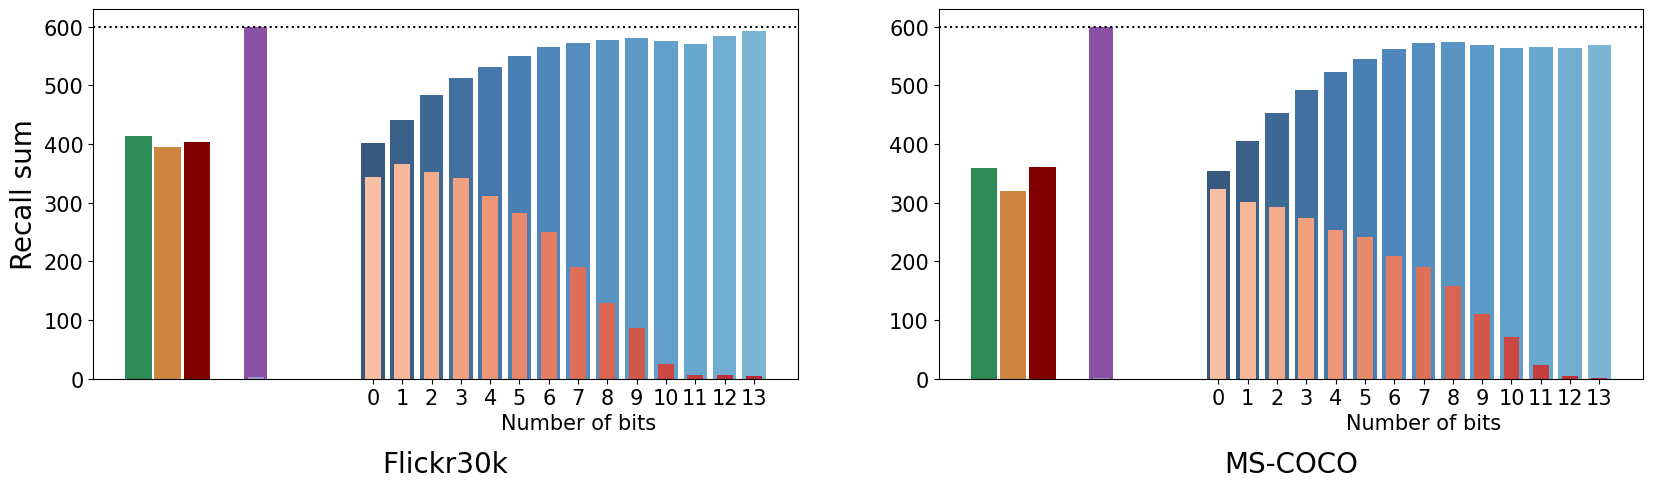

In [6]:
def generate_plt(
        model='CLIP',
        f30k_scores=clip_f30k_scores,
        coco_scores=clip_coco_scores,
        scale='linear',
        legend=True

):

    
    # unpack variables
    f30k_finetuned, f30k_captions_only, f30k_images_only, f30k_zeroshot, f30k_without_sc, f30k_with_sc, \
        f30k_unique_shortcuts_eval_w, f30k_unique_shortcuts_eval_wo = f30k_scores
    coco_finetuned, coco_captions_only, coco_images_only, coco_zeroshot, coco_without_sc, coco_with_sc, \
        coco_unique_shortcuts_eval_w, coco_unique_shortcuts_eval_wo = coco_scores

    # plot parameters
    cm = plt.cm.RdBu_r
    cm3 = plt.cm.BuPu_r

    n = 0.65
    k = 0.25

    ratio = 0.6
    width = 0.9

    extra_bars = 4

    # subplots and indices
    fig, (ax1, ax2) = plt.subplots(1, 2)

    fig.set_figwidth(20)

    indices = np.arange(extra_bars * 2, len(f30k_without_sc) + extra_bars * 2)

    # organizing bars
    ax1.bar(0, f30k_finetuned, width=width,
            color='seagreen', label=f'Baseline -  no shortcuts')
    ax1.bar(1, f30k_captions_only, width=width,
            color='peru', label=f'Only shortcuts on the captions')
    ax1.bar(2, f30k_images_only, width=width,
            color='maroon', label=f'Only shortcuts on the images')

    ax2.bar(0, coco_finetuned, width=width,
            color='seagreen', label=f'{model} ')
    ax2.bar(1, coco_captions_only, width=width,
            color='peru', label=f'{model}P - w/ only shortcuts on the captions')
    ax2.bar(2, coco_images_only, width=width,
            color='maroon', label=f'{model} - w/ only shortcuts on the images')

    ax1.bar(3, 0, width=0)
    ax2.bar(3, 0, width=0)

    ax1.bar(4, f30k_unique_shortcuts_eval_w,
            color=cm3(0.3), label=f'Unique shortcuts - eval w/ shortcuts')
    ax1.bar(4, f30k_unique_shortcuts_eval_wo,
            color=cm3(0.6), label=f'Unique shortcuts - eval w/o shortcuts', width=width * ratio,
            alpha=0.8)

    ax2.bar(4, coco_unique_shortcuts_eval_w,
            color=cm3(0.3), label=f'Unique shortcuts - eval w/ shortcuts')
    ax2.bar(4, coco_unique_shortcuts_eval_wo,
            color=cm3(0.6), label=f'Unique shortcuts - eval w/o shortcuts', width=width * ratio, alpha=0.8)

    ax1.bar(5, 0, width=0)
    ax2.bar(5, 0, width=0)

    ax1.bar([i for i in indices], f30k_with_sc, alpha=0.8,
            color=[cm(k * (i / len(f30k_with_sc))) for i in range(0, len(f30k_with_sc))],
            label=f'N bits of shortcuts - eval w/ shortcuts')
    ax1.bar(indices, f30k_without_sc, width=width * ratio,
            color=[cm(n + k * (i / len(f30k_without_sc))) for i in range(0, len(f30k_without_sc))],
            label=f'N bits of shortcuts - eval w/o shortcuts')

    ax2.bar([i for i in indices], coco_with_sc, alpha=0.8,
            color=[cm(k * (i / len(coco_with_sc))) for i in range(0, len(coco_with_sc))],
            label=f'{model} - eval w/ shortcuts')

    ax2.bar(indices, coco_without_sc, width=width * ratio,
            color=[cm(n + k * (i / len(coco_without_sc))) for i in range(0, len(coco_without_sc))],
            label=f'{model} - eval w/o shortcuts')

    ax1.set_xticks(
        indices,
        ['{}'.format(i) for i in range(len(f30k_with_sc))],
        fontsize=15
    )

    ax2.set_xticks(
        indices,
        ['{}'.format(i) for i in range(len(f30k_with_sc))],
        fontsize=15

    )

    ax1.axhline(y=600, color='black', linestyle=':',label=f'Max eval score')
    ax2.axhline(y=600, color='black', linestyle=':')

    if model == 'CLIP':
        ax1.axhline(y=f30k_zeroshot, color='black', linestyle='--', label=f'CLIP zero-shot')
        ax2.axhline(y=coco_zeroshot, color='black', linestyle='--', label=f'CLIP zero-shot')
    
    if scale == 'linear':
        y1 = y2 = -75
    elif scale == 'log':
        if model == 'CLIP FT':
            y1 = 410
            y2 = 122
        elif model == 'VSE':
            y1 = 1.25
            y2 = 0.2
    else:
        raise NotImplementedError('Unknown model type, options: ["CLIP", "VSE"]')

    ax1.text(
        15, y1,
        'Number of bits', fontsize=15, va='center', ha='center')
    ax2.text(
        15, y2,
        'Number of bits', fontsize=15, va='center', ha='center')

    prop = fm.FontProperties(weight='bold', size=15)
    ax1.legend(bbox_to_anchor=(0.05, 1), mode="", ncol=3, prop=prop) if legend else None 

    # x and y labels
    font_size = 20
    ax1.set_ylabel("Recall sum", fontsize=font_size)
    ax1.set_xlabel("Flickr30k", fontsize=font_size)
    ax2.set_xlabel("MS-COCO", fontsize=font_size)

    # set scale
    ax1.set_yscale(scale)
    ax2.set_yscale(scale)

    ax1.xaxis.labelpad = 30
    ax2.xaxis.labelpad = 30

    # TODO: fix tick size
    label_size=15
    ax1.tick_params(axis='y', which='major', labelsize=label_size)
    ax2.tick_params(axis='y', which='major', labelsize=label_size)

    # define local file path, save the plot
    img_root = f'./out'

    file_path = os.path.join(img_root, f'{model}_f30k_coco_shortcut_eval_{scale}.pdf')
    plt.savefig(file_path, format="pdf", bbox_inches="tight")
    print(f'Saved {model} plot to {file_path}')
    plt.show()


generate_plt(
    model='CLIP',
    f30k_scores=clip_f30k_scores,
    coco_scores=clip_coco_scores,
    scale='linear',
    legend=True
)

generate_plt(
    model='VSE',
    f30k_scores=vse_f30k_scores,
    coco_scores=vse_coco_scores,
    scale='linear',
    legend=False
)